In [1]:
SELECT * FROM 'student_data.csv';

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,True,False,False,False,True,True,False,False,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,False,True,False,False,False,True,True,False,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,True,False,True,False,True,True,True,False,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,False,True,True,True,True,True,True,True,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,False,True,True,False,True,True,False,False,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,False,True,True,False,True,True,False,False,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,False,False,False,False,False,True,True,False,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,False,False,False,False,False,True,False,False,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,False,False,False,False,False,True,True,False,4,4,1,3,4,5,0,11,12,10


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

# Load the dataset
data = pd.read_csv('student_data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Since this is not a true time series dataset, we'll create a synthetic time series

In [4]:
# by aggregating average grades over time (using student age as a proxy for time)
time_series_data = data.groupby('age')['G3'].mean().reset_index()


## Convert to datetime for proper time series analysis

In [6]:
# Using first day of each month in 2023 as arbitrary dates for demonstration
dates = pd.date_range(start='2023-01-01', periods=len(time_series_data), freq='MS')
time_series_data['date'] = dates
time_series_data.set_index('date', inplace=True)

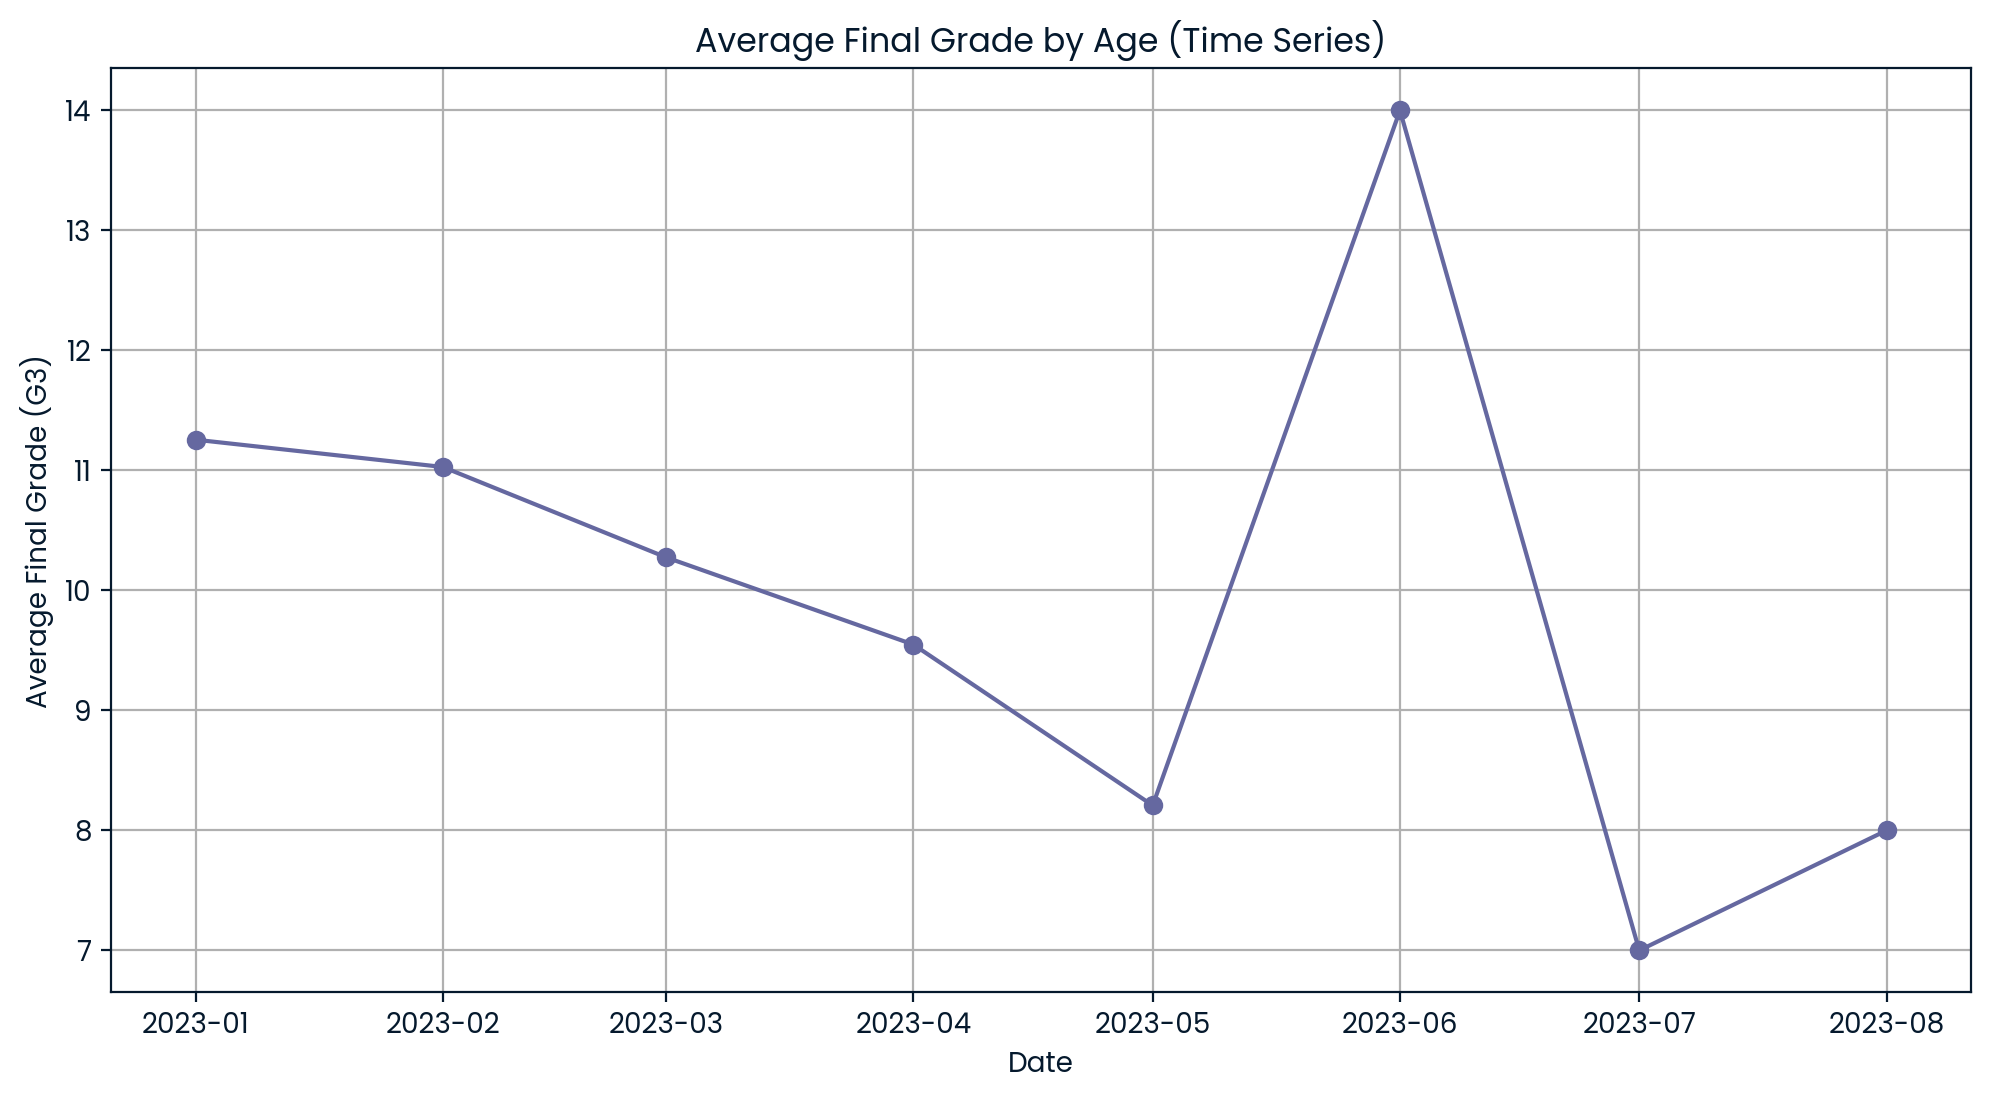

In [7]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['G3'], marker='o', linestyle='-')
plt.title('Average Final Grade by Age (Time Series)')
plt.xlabel('Date')
plt.ylabel('Average Final Grade (G3)')
plt.grid(True)
plt.savefig('time_series_plot.png')
plt.show()

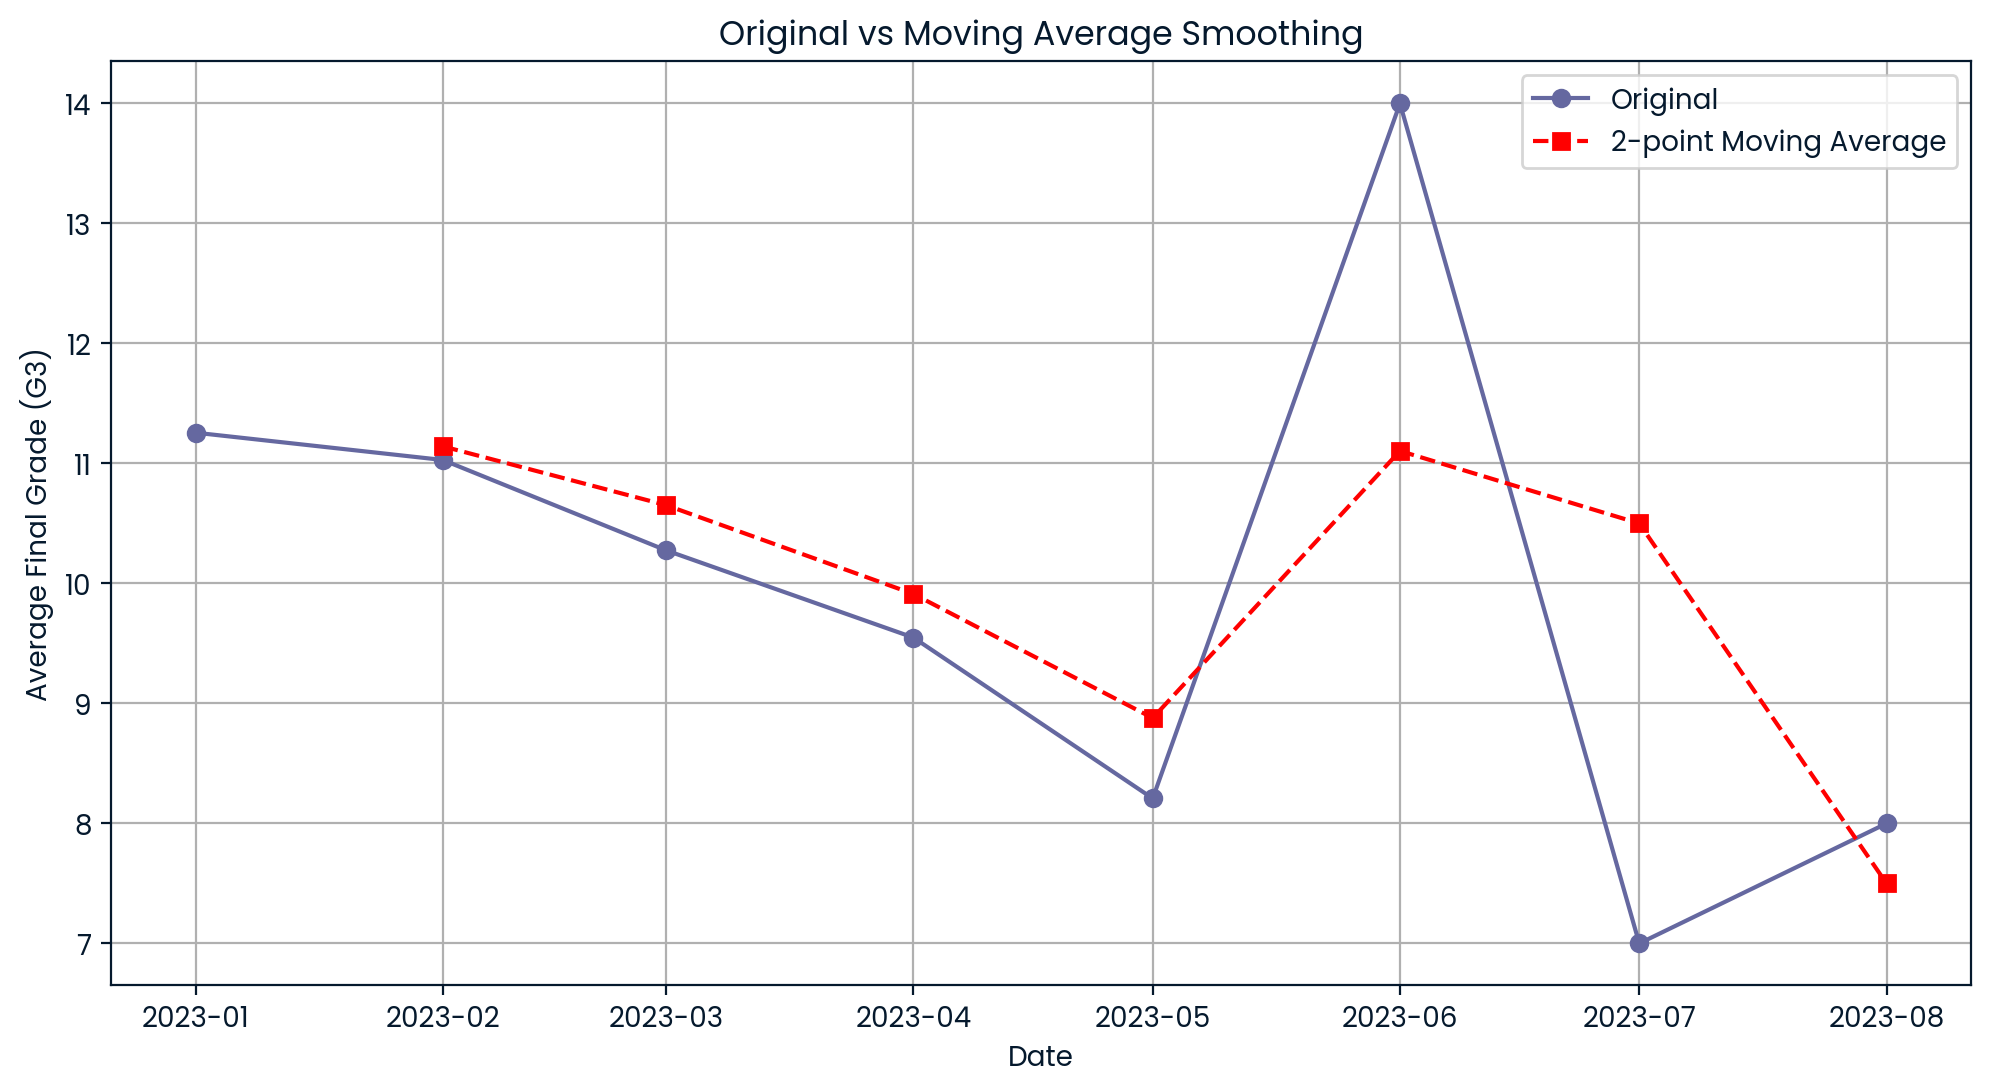

In [8]:

# Apply moving average smoothing
window_size = 2  # Using a small window size due to limited data points
time_series_data['MA'] = time_series_data['G3'].rolling(window=window_size).mean()

# Plot original vs moving average
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['G3'], marker='o', linestyle='-', label='Original')
plt.plot(time_series_data.index, time_series_data['MA'], marker='s', linestyle='--', color='red', label=f'{window_size}-point Moving Average')
plt.title('Original vs Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Average Final Grade (G3)')
plt.legend()
plt.grid(True)
plt.savefig('moving_average.png')
plt.show()